In [22]:
import pandas as pd
import shapely
import geopandas as gpd
import matplotlib.pyplot as plt

In [23]:
DH = pd.read_csv("../results/Denhaag.csv", index_col = 0)
EH = pd.read_csv("../results/Eindhoven.csv", index_col = 0)
NM = pd.read_csv("../results/Nijmegen.csv", index_col = 0)

# non cluster models

In [24]:
DH1 = DH[~DH.index.str.contains("ust")]
EH1 = EH[~EH.index.str.contains("ust")]
NM1 = NM[~NM.index.str.contains("ust")]

In [25]:
tot = DH1.join(EH1, rsuffix = "_EIND").join(NM1, rsuffix = "_NM")
tot = tot.transpose()
tot

model,RF,MLP,CNN,RNN,RNNCNN,XGB
auc,0.677484,0.679318,0.592242,0.676105,0.664910,0.680866
f1,0.383407,0.400098,0.337261,0.401423,0.389228,0.384389
auc_EIND,0.684324,0.670751,0.603258,0.689692,0.663678,0.683336
f1_EIND,0.214421,0.265655,0.210626,0.238095,0.242236,0.208729
auc_NM,0.659007,0.662382,0.601488,0.679314,0.648543,0.668151
f1_NM,0.236908,0.264339,0.177057,0.258799,0.231405,0.241895


In [26]:
arrays = [["Den haag", "Den haag", "Eindhoven", "Eindhoven", "Nijmegen", "Nijmegen"],
            ["AUC", "F1", "AUC", "F1", "AUC", "F1"]
          ]
tuples = list(zip(*arrays))

In [27]:
tuples

[('Den haag', 'AUC'),
 ('Den haag', 'F1'),
 ('Eindhoven', 'AUC'),
 ('Eindhoven', 'F1'),
 ('Nijmegen', 'AUC'),
 ('Nijmegen', 'F1')]

In [28]:
index = pd.MultiIndex.from_tuples(tuples, names=["City", "Score"])
tot.index = index

In [29]:
cols = ["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]

In [30]:
b = tot[cols]
b

model                  RF       XGB       MLP       CNN       RNN    RNNCNN
City      Score                                                            
Den haag  AUC    0.677484  0.680866  0.679318  0.592242  0.676105  0.664910
          F1     0.383407  0.384389  0.400098  0.337261  0.401423  0.389228
Eindhoven AUC    0.684324  0.683336  0.670751  0.603258  0.689692  0.663678
          F1     0.214421  0.208729  0.265655  0.210626  0.238095  0.242236
Nijmegen  AUC    0.659007  0.668151  0.662382  0.601488  0.679314  0.648543
          F1     0.236908  0.241895  0.264339  0.177057  0.258799  0.231405

In [31]:
# b.to_excel("../results/non_cluster_table.xlsx")

# Cluster

In [32]:
DH2 = DH[DH.index.str.contains("ust")]
EH2 = EH[EH.index.str.contains("ust")]
NM2 = NM[NM.index.str.contains("ust")]

In [90]:
DH2

,auc,f1
model,,
XGB,0.627888,0.350025
RF,0.666014,0.363770
MLP,0.597170,0.327442
RNNCNN,0.668355,0.379065
RNN,0.598413,0.356199
CNN,0.599998,0.338733


In [34]:
tot = DH2.join(EH2, rsuffix = "_EIND").join(NM2, rsuffix = "_NM")
tot = tot.transpose()


In [35]:
cols = ['RF_cluster', 'XGB_cluster','MLP_cluster', 'CNN_cluster', 'RNN_cluster', 'RNNCNN_cluster']

In [36]:
tot

model,XGB_cluster,RF_cluster,MLP_cluster,RNNCNN_cluster,RNN_cluster,CNN_cluster
auc,0.627888,0.666014,0.597170,0.668355,0.598413,0.599998
f1,0.350025,0.363770,0.327442,0.379065,0.356199,0.338733
auc_EIND,0.634573,0.676315,0.684361,0.642475,0.652714,0.590821
f1_EIND,0.187856,0.214421,0.254269,0.198758,0.204969,0.174573
auc_NM,0.635031,0.645624,0.651661,0.574660,0.657119,0.566657
f1_NM,0.211970,0.229426,0.256858,0.217631,0.250689,0.139651


In [37]:
tot = tot[cols]
cols = ['RF', 'XGB','MLP', 'CNN', 'RNN', 'RNNCNN']
tot.columns = cols

In [38]:
index = pd.MultiIndex.from_tuples(tuples, names=["City", "Score"])
tot.index = index

In [39]:
tot

RF       XGB       MLP       CNN       RNN    RNNCNN
City      Score                                                            
Den haag  AUC    0.666014  0.627888  0.597170  0.599998  0.598413  0.668355
          F1     0.363770  0.350025  0.327442  0.338733  0.356199  0.379065
Eindhoven AUC    0.676315  0.634573  0.684361  0.590821  0.652714  0.642475
          F1     0.214421  0.187856  0.254269  0.174573  0.204969  0.198758
Nijmegen  AUC    0.645624  0.635031  0.651661  0.566657  0.657119  0.574660
          F1     0.229426  0.211970  0.256858  0.139651  0.250689  0.217631

In [40]:
# tot.to_excel("../results/Clustertable.xlsx")

# differences

In [41]:
DHauc = pd.read_csv("../results/DenhaagAUC.csv", index_col = 0)
DHf1 = pd.read_csv("../results/Denhaagf1.csv", index_col = 0)

DH1.columns = ["auc_CA", "f1_CA"]
DH2.columns = ["auc_clust", "f1_clust"]

DH2.index = DH2.index.str.strip("_cluster")
DHauc.index = DHauc.index.str.strip("_cluster")
DHauc.columns = ["auc_cluster 1", "auc_cluster 2", "auc_cluster 3"]
DHf1.index = DHf1.index.str.strip("_cluster")
DHf1.columns = ["f1_cluster 1", "f1_cluster 2", "f1_cluster 3"]
totDH = DH1.join(DH2.join(DHauc.join(DHf1)))
totDH = totDH.loc[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

In [42]:
EHauc = pd.read_csv("../results/EindhovenAUC.csv", index_col = 0)
EHf1 = pd.read_csv("../results/Eindhovenf1.csv", index_col = 0)

EH1.columns = ["auc_CA", "f1_CA"]
EH2.columns = ["auc_clust", "f1_clust"]

EH2.index = EH2.index.str.strip("_cluster")
EHauc.index = EHauc.index.str.strip("_cluster")
EHauc.columns = ["auc_cluster 1", "auc_cluster 2"]
EHf1.index = EHf1.index.str.strip("_cluster")
EHf1.columns = ["f1_cluster 1", "f1_cluster 2"]
totEH = EH1.join(EH2.join(EHauc.join(EHf1)))
totEH = totEH.loc[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

In [43]:
NMauc = pd.read_csv("../results/NijmegenAUC.csv", index_col = 0)
NMf1 = pd.read_csv("../results/Nijmegenf1.csv", index_col = 0)

NM1.columns = ["auc_CA", "f1_CA"]
NM2.columns = ["auc_clust", "f1_clust"]

NM2.index = NM2.index.str.strip("_cluster")
NMauc.index = NMauc.index.str.strip("_cluster")
NMauc.columns = ["auc_cluster 1", "auc_cluster 2", "auc_cluster 3"]
NMf1.index = NMf1.index.str.strip("_cluster")
NMf1.columns = ["f1_cluster 1", "f1_cluster 2", "f1_cluster 3"]
totNM = NM1.join(NM2.join(NMauc.join(NMf1)))
totNM = totNM.loc[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

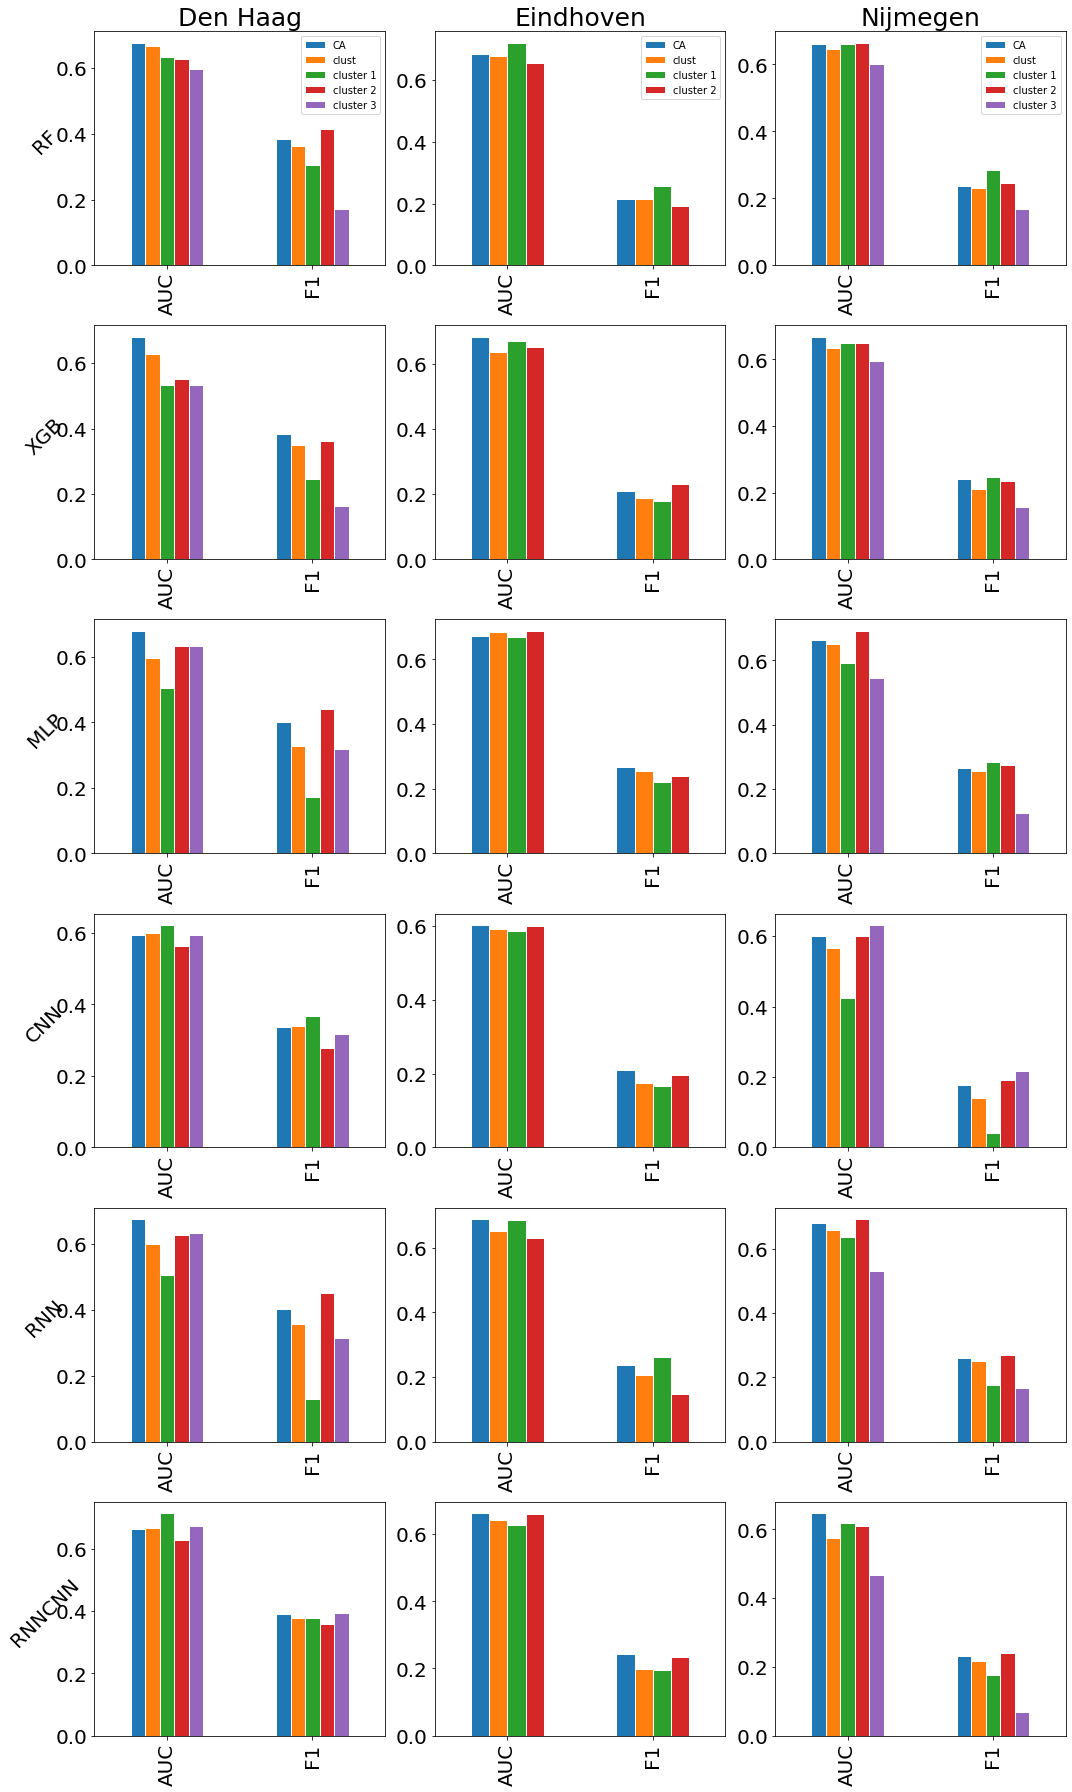

In [53]:
fig, ax = plt.subplots(6,3, figsize = (15,25))
for j, city in enumerate([totDH, totEH, totNM]):
    for i,(model,row) in enumerate(city.iterrows()):

        auc = pd.DataFrame(row[row.index.str.contains("auc")]).T
        f1 = pd.DataFrame(row[row.index.str.contains("f1")]).T
        auc.index = ["AUC"]
        f1.index = ["F1"]

        auc.columns = auc.columns.str.replace("auc_", "")
        f1.columns = f1.columns.str.replace("f1_", "")

        row = pd.concat([auc,f1])
        if i == 0:
            row.plot(kind = "bar", ax = ax[i,j], edgecolor = "white")
        else:
            row.plot(kind = "bar", ax = ax[i,j], edgecolor = "white", legend = False)
        if j == 0:
            ax[i,j].set_ylabel(model, rotation=45, size = 20)
            
        ax[i,j].tick_params(axis = 'both', which = 'major', labelsize = 20)
            
ax[0,0].set_title("Den Haag", size = 25)
ax[0,1].set_title("Eindhoven", size = 25)
ax[0,2].set_title("Nijmegen", size = 25)
fig.tight_layout()
# ax[0,0].ylabel("RF")
# fig.savefig("../figures/clustertotalresults.png")

In [54]:
fig.savefig("../figures/clustertotalresults.png")

## difference table

In [59]:
EH1.columns = ["auc", "f1"]
EH2.columns = ["auc", "f1"]
NM1.columns = ["auc", "f1"]
NM2.columns = ["auc", "f1"]
DH1.columns = ["auc", "f1"]
DH2.columns = ["auc", "f1"]

In [69]:
changeEH = (EH2 - EH1) / EH1
changeDH = (DH2 - DH1) / DH1
changeNM = (NM2 - NM1) / NM1

In [85]:
totchange = changeDH.join(changeEH.join(changeNM, rsuffix = "_NM"), rsuffix = "_EH").T * 100

In [86]:
totchange = totchange[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

In [87]:
index = pd.MultiIndex.from_tuples(tuples, names=["City", "Score"])
totchange.index = index

In [89]:
totchange.to_excel("../results/clusterchanges.xlsx")

# resulting cities plaatjes

In [66]:
import pickle
import os
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

import numpy as np

In [19]:
def load_data(city):
    os.getcwd()
    df = pd.DataFrame()
    path = "../Data/filled/" + city + ".csv"
    

    df1 = pd.read_csv(path )
    if df1.geometry.isna().any():
        print(filename)
    df = pd.concat([df, df1])
    df = gpd.GeoDataFrame(df)
    df.geometry = df.geometry.apply(shapely.wkt.loads)
    
    df = df.reset_index()
    df = df.drop(["Unnamed: 0", "index"], axis = 1)
    return df

In [30]:
DH15 = load_data("'s-Gravenhage15.csv_filled_").set_index("C28992R100")
DH16 = load_data("'s-Gravenhage16.csv_filled_").set_index("C28992R100")
DH17 = load_data("'s-Gravenhage17.csv_filled_").set_index("C28992R100")
DH18 = load_data("'s-Gravenhage18.csv_filled_").set_index("C28992R100")
DH19 = load_data("'s-Gravenhage19.csv_filled_").set_index("C28992R100")
overlapping1517 = DH17.index[DH17.index.isin(DH16.index[DH16.index.isin(DH15.index)])]
overlapping1518 = DH18.index[DH18.index.isin(overlapping1517)]
overlapping1519 = DH19.index[DH19.index.isin(overlapping1518)]
DH = DH19.loc[overlapping1519]

NM15 = load_data("Nijmegen15.csv_filled_").set_index("C28992R100")
NM16 = load_data("Nijmegen16.csv_filled_").set_index("C28992R100")
NM17 = load_data("Nijmegen17.csv_filled_").set_index("C28992R100")
NM18 = load_data("Nijmegen18.csv_filled_").set_index("C28992R100")
NM19 = load_data("Nijmegen19.csv_filled_").set_index("C28992R100")
overlapping1517 = NM17.index[NM17.index.isin(NM16.index[NM16.index.isin(NM15.index)])]
overlapping1518 = NM18.index[NM18.index.isin(overlapping1517)]
overlapping1519 = NM19.index[NM19.index.isin(overlapping1518)]
NM = NM19.loc[overlapping1519]

EH15 = load_data("eindhoven15.csv_filled_").set_index("C28992R100")
EH16 = load_data("eindhoven16.csv_filled_").set_index("C28992R100")
EH17 = load_data("eindhoven17.csv_filled_").set_index("C28992R100")
EH18 = load_data("eindhoven18.csv_filled_").set_index("C28992R100")
EH19 = load_data("eindhoven19.csv_filled_").set_index("C28992R100")
overlapping1517 = EH17.index[EH17.index.isin(EH16.index[EH16.index.isin(EH15.index)])]
overlapping1518 = EH18.index[EH18.index.isin(overlapping1517)]
overlapping1519 = EH19.index[EH19.index.isin(overlapping1518)]
EH = EH19.loc[overlapping1519]

In [82]:
with open('../results/DHRNNpreds', 'rb') as f:
    DHpreds = pickle.load(f)
    
    
with open('../results/NMRNNpreds', 'rb') as f:
    NMpreds = pickle.load(f)
        
    
with open('../results/EHRNNpreds', 'rb') as f:
    EHpreds = pickle.load(f)
    
    


In [83]:
y = NM.y.values
preds = np.zeros(len(y))
posIDX = NMpreds.argsort()[-(np.sum(y==1)) : ]
preds[posIDX] = 1
NMpreds = preds

In [85]:

def checker(d):
    if d["y"] == 0 and d["preds"] == 0:
        return 0
    if d["y"] == 0 and d["preds"] == 1:
        return 1
    if d["y"] == 1 and d["preds"] == 0:
        return 2
    if d["y"] == 1 and d["preds"] == 1:
        return 3
    
DH["preds"] = DHpreds
DH["checked"] = DH.apply(checker, axis =1)
NM["preds"] = NMpreds    
NM["checked"] = NM.apply(checker, axis =1)
EH["preds"] = EHpreds    
EH["checked"] = EH.apply(checker, axis =1)

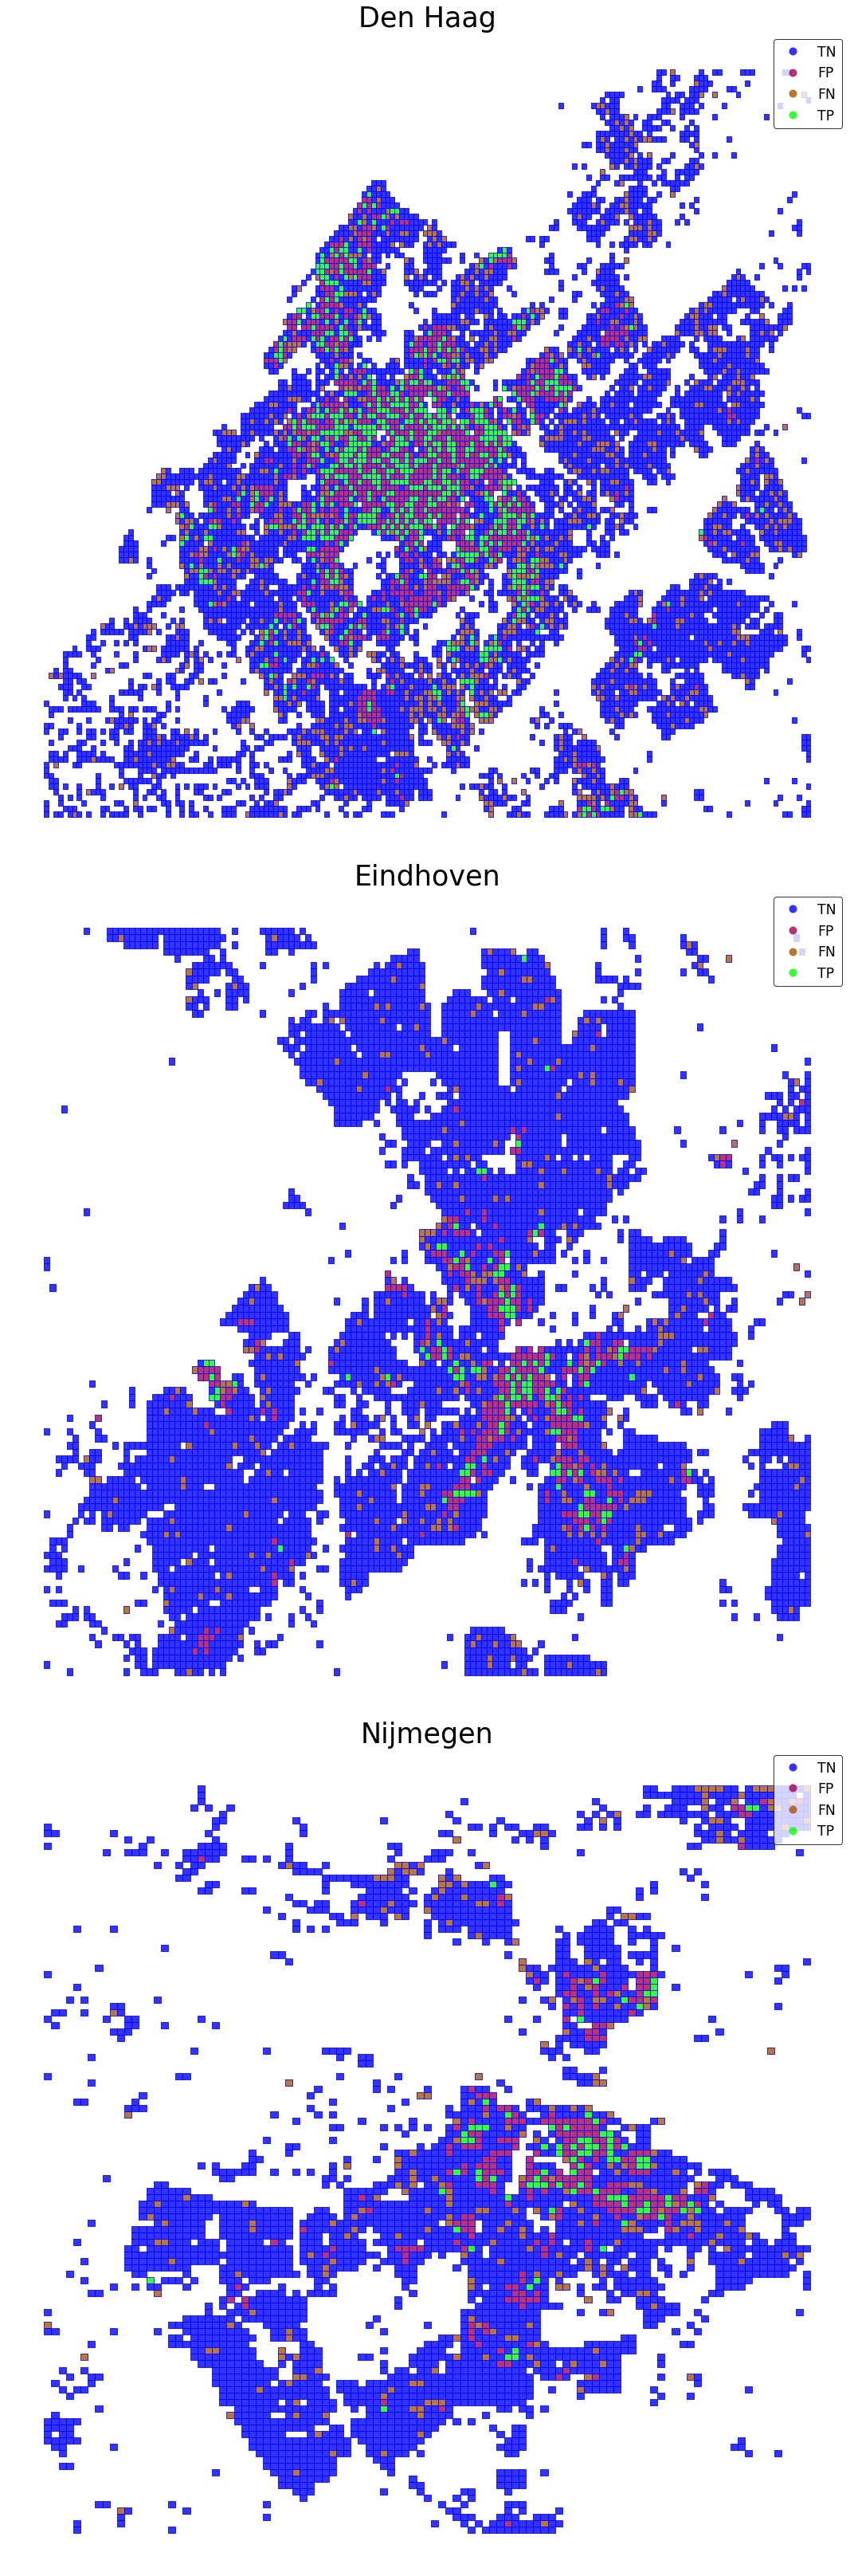

In [218]:
fig, ax = plt.subplots(3,1, figsize = (15,45))
mapper = {0: "TN", 1: "FP", 2 : "FN", 3: "TP"}
DH.plot( cmap = "brg", column = "checked", ax = ax[0], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
EH.plot( cmap = "brg", column = "checked", ax = ax[1], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
NM.plot( cmap = "brg", column = "checked", ax = ax[2], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
                
legend = ax[0].get_legend()             
replace_legend_items(legend, mapper)
legend = ax[1].get_legend()   
replace_legend_items(legend, mapper)
legend = ax[2].get_legend()   
replace_legend_items(legend, mapper)
ax[0].set_title("Den Haag", size = 35)
ax[1].set_title("Eindhoven", size = 35)
ax[2].set_title("Nijmegen", size = 35)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

ax[0].set_aspect('auto')
ax[1].set_aspect('auto')
ax[2].set_aspect('auto')
fig.tight_layout()

plt.savefig("../figures/errormaps.png")

<AxesSubplot:>

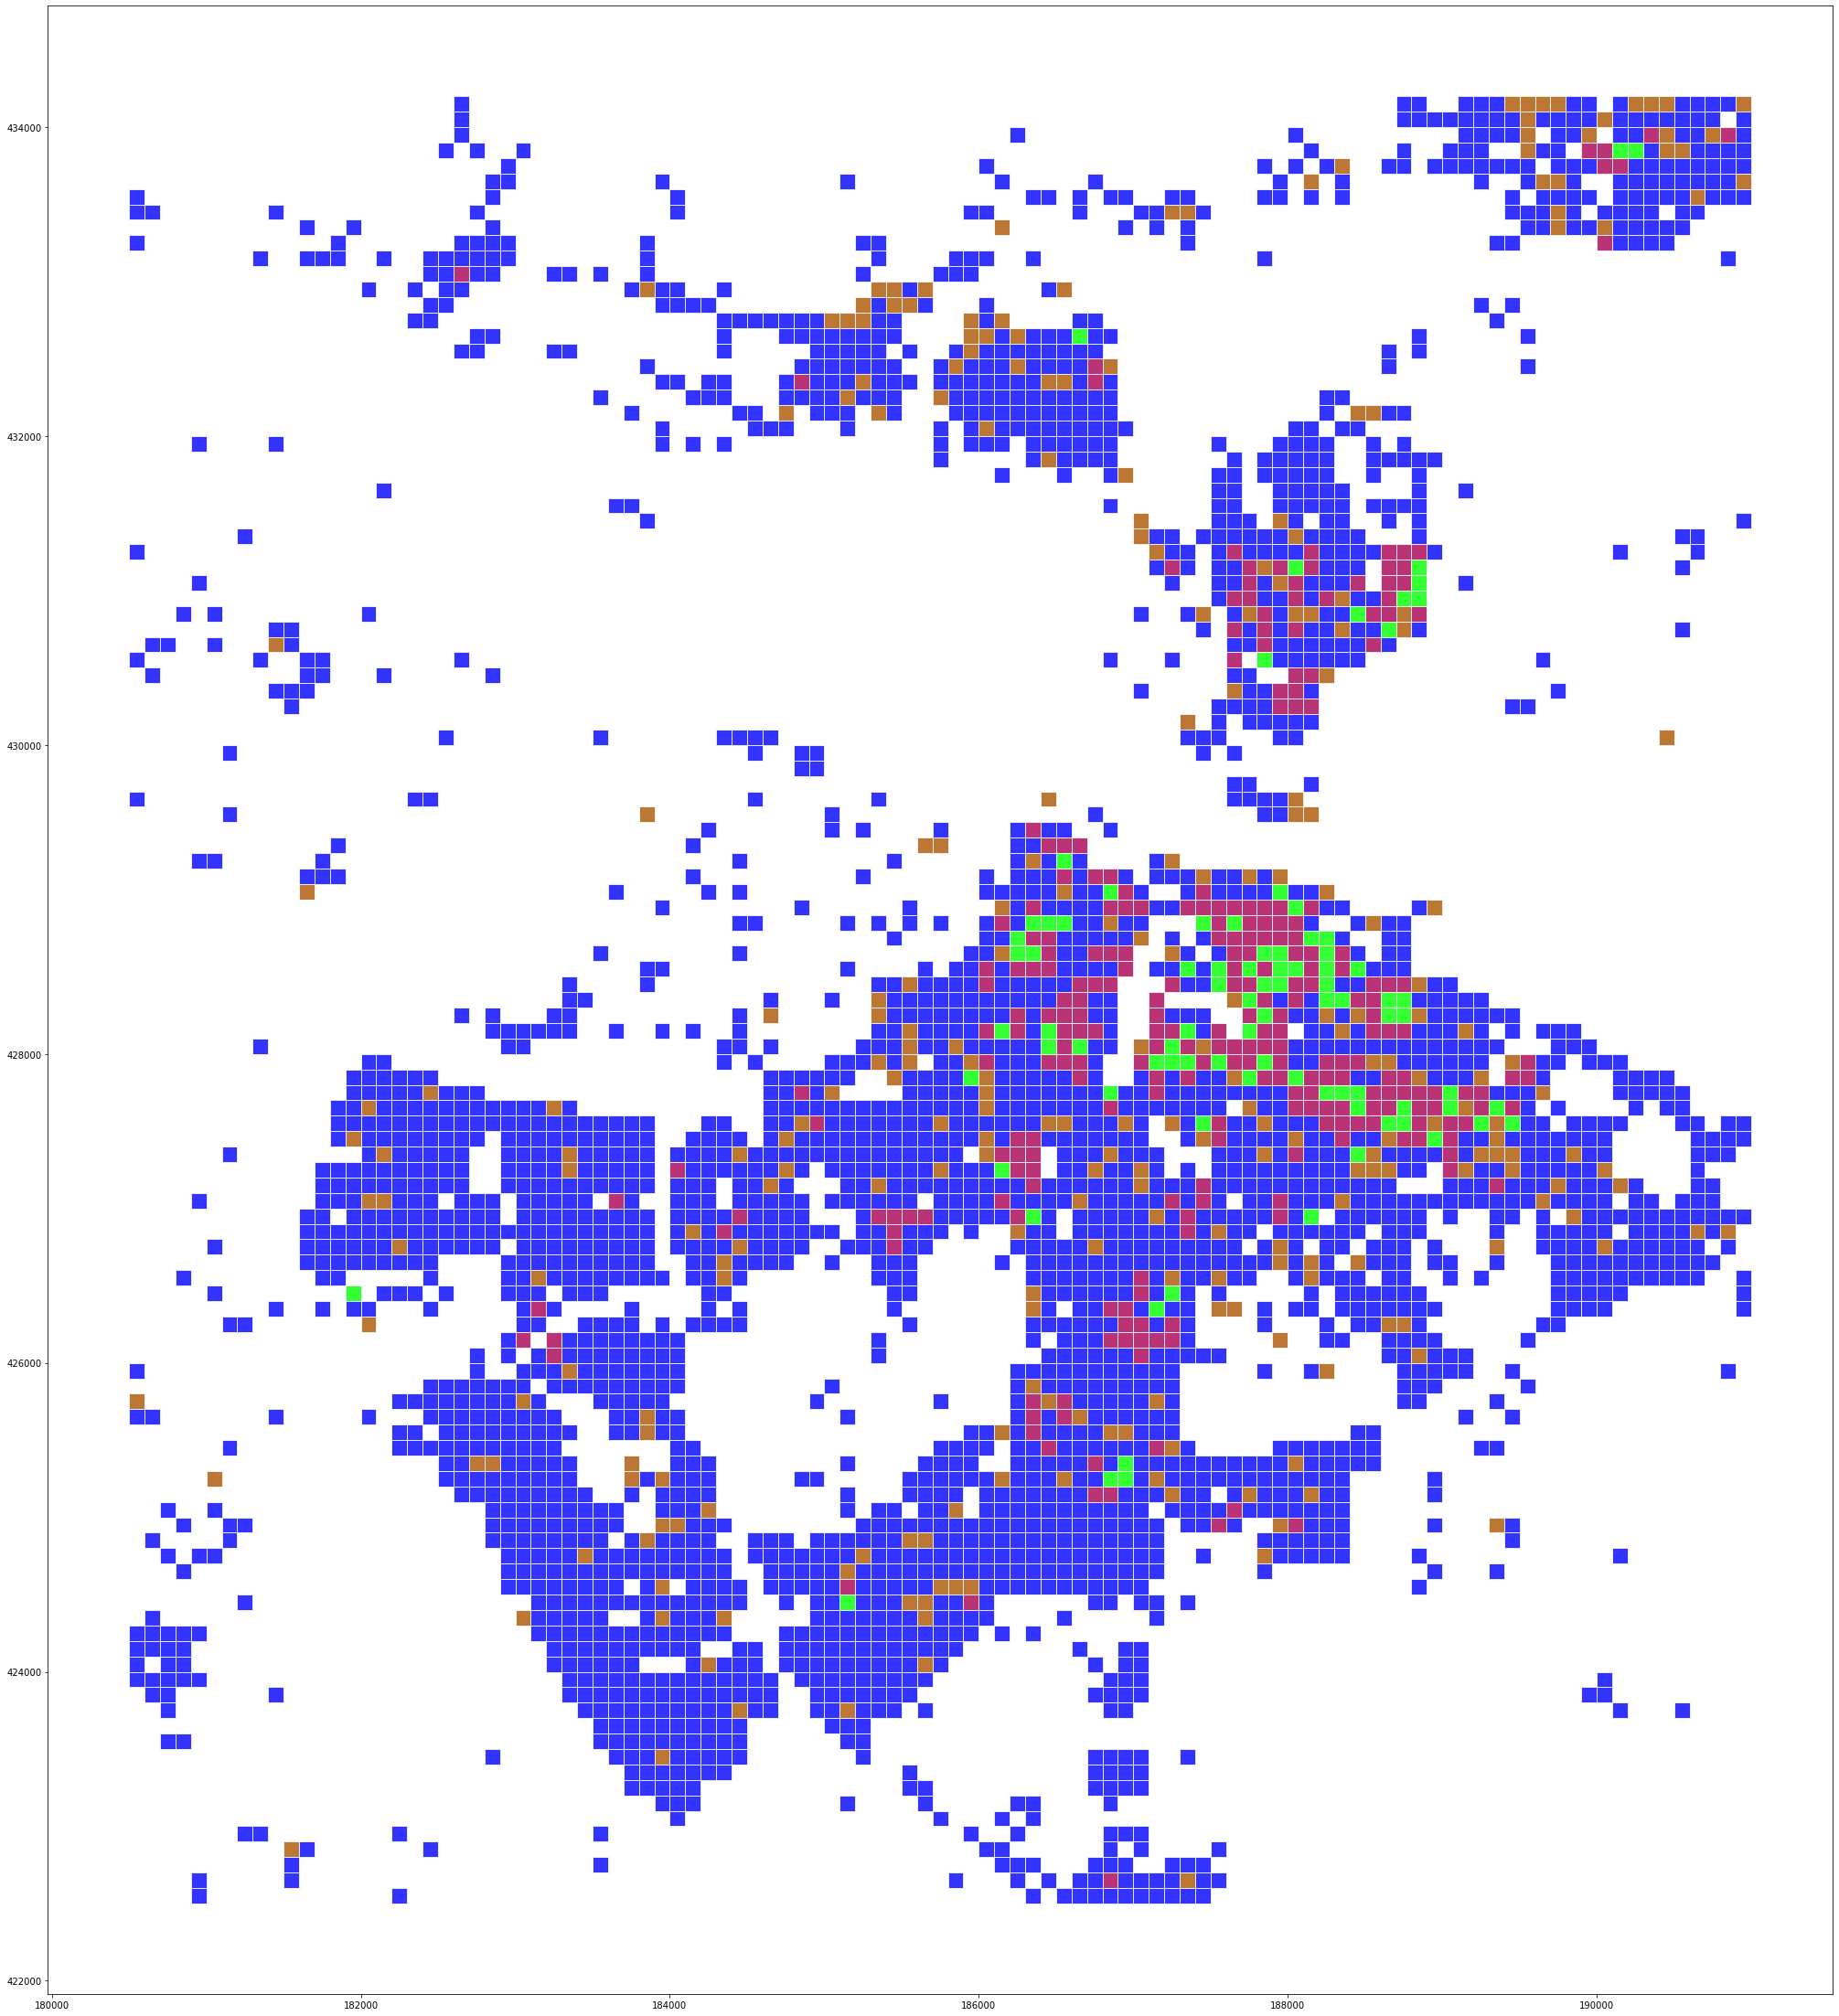

In [97]:
NM.plot(figsize = (40,40), cmap = "brg", column = "checked", categorical=True, edgecolor = "w", alpha = 0.8)

# feature importance

In [166]:
import xgboost

In [167]:
DHx = xgboost.XGBClassifier()
DHx.load_model("../Results/XGBDHmodel")
NMx = xgboost.XGBClassifier()
NMx.load_model("../Results/XGBNMmodel")
EHx = xgboost.XGBClassifier()
EHx.load_model("../Results/XGBEHmodel")

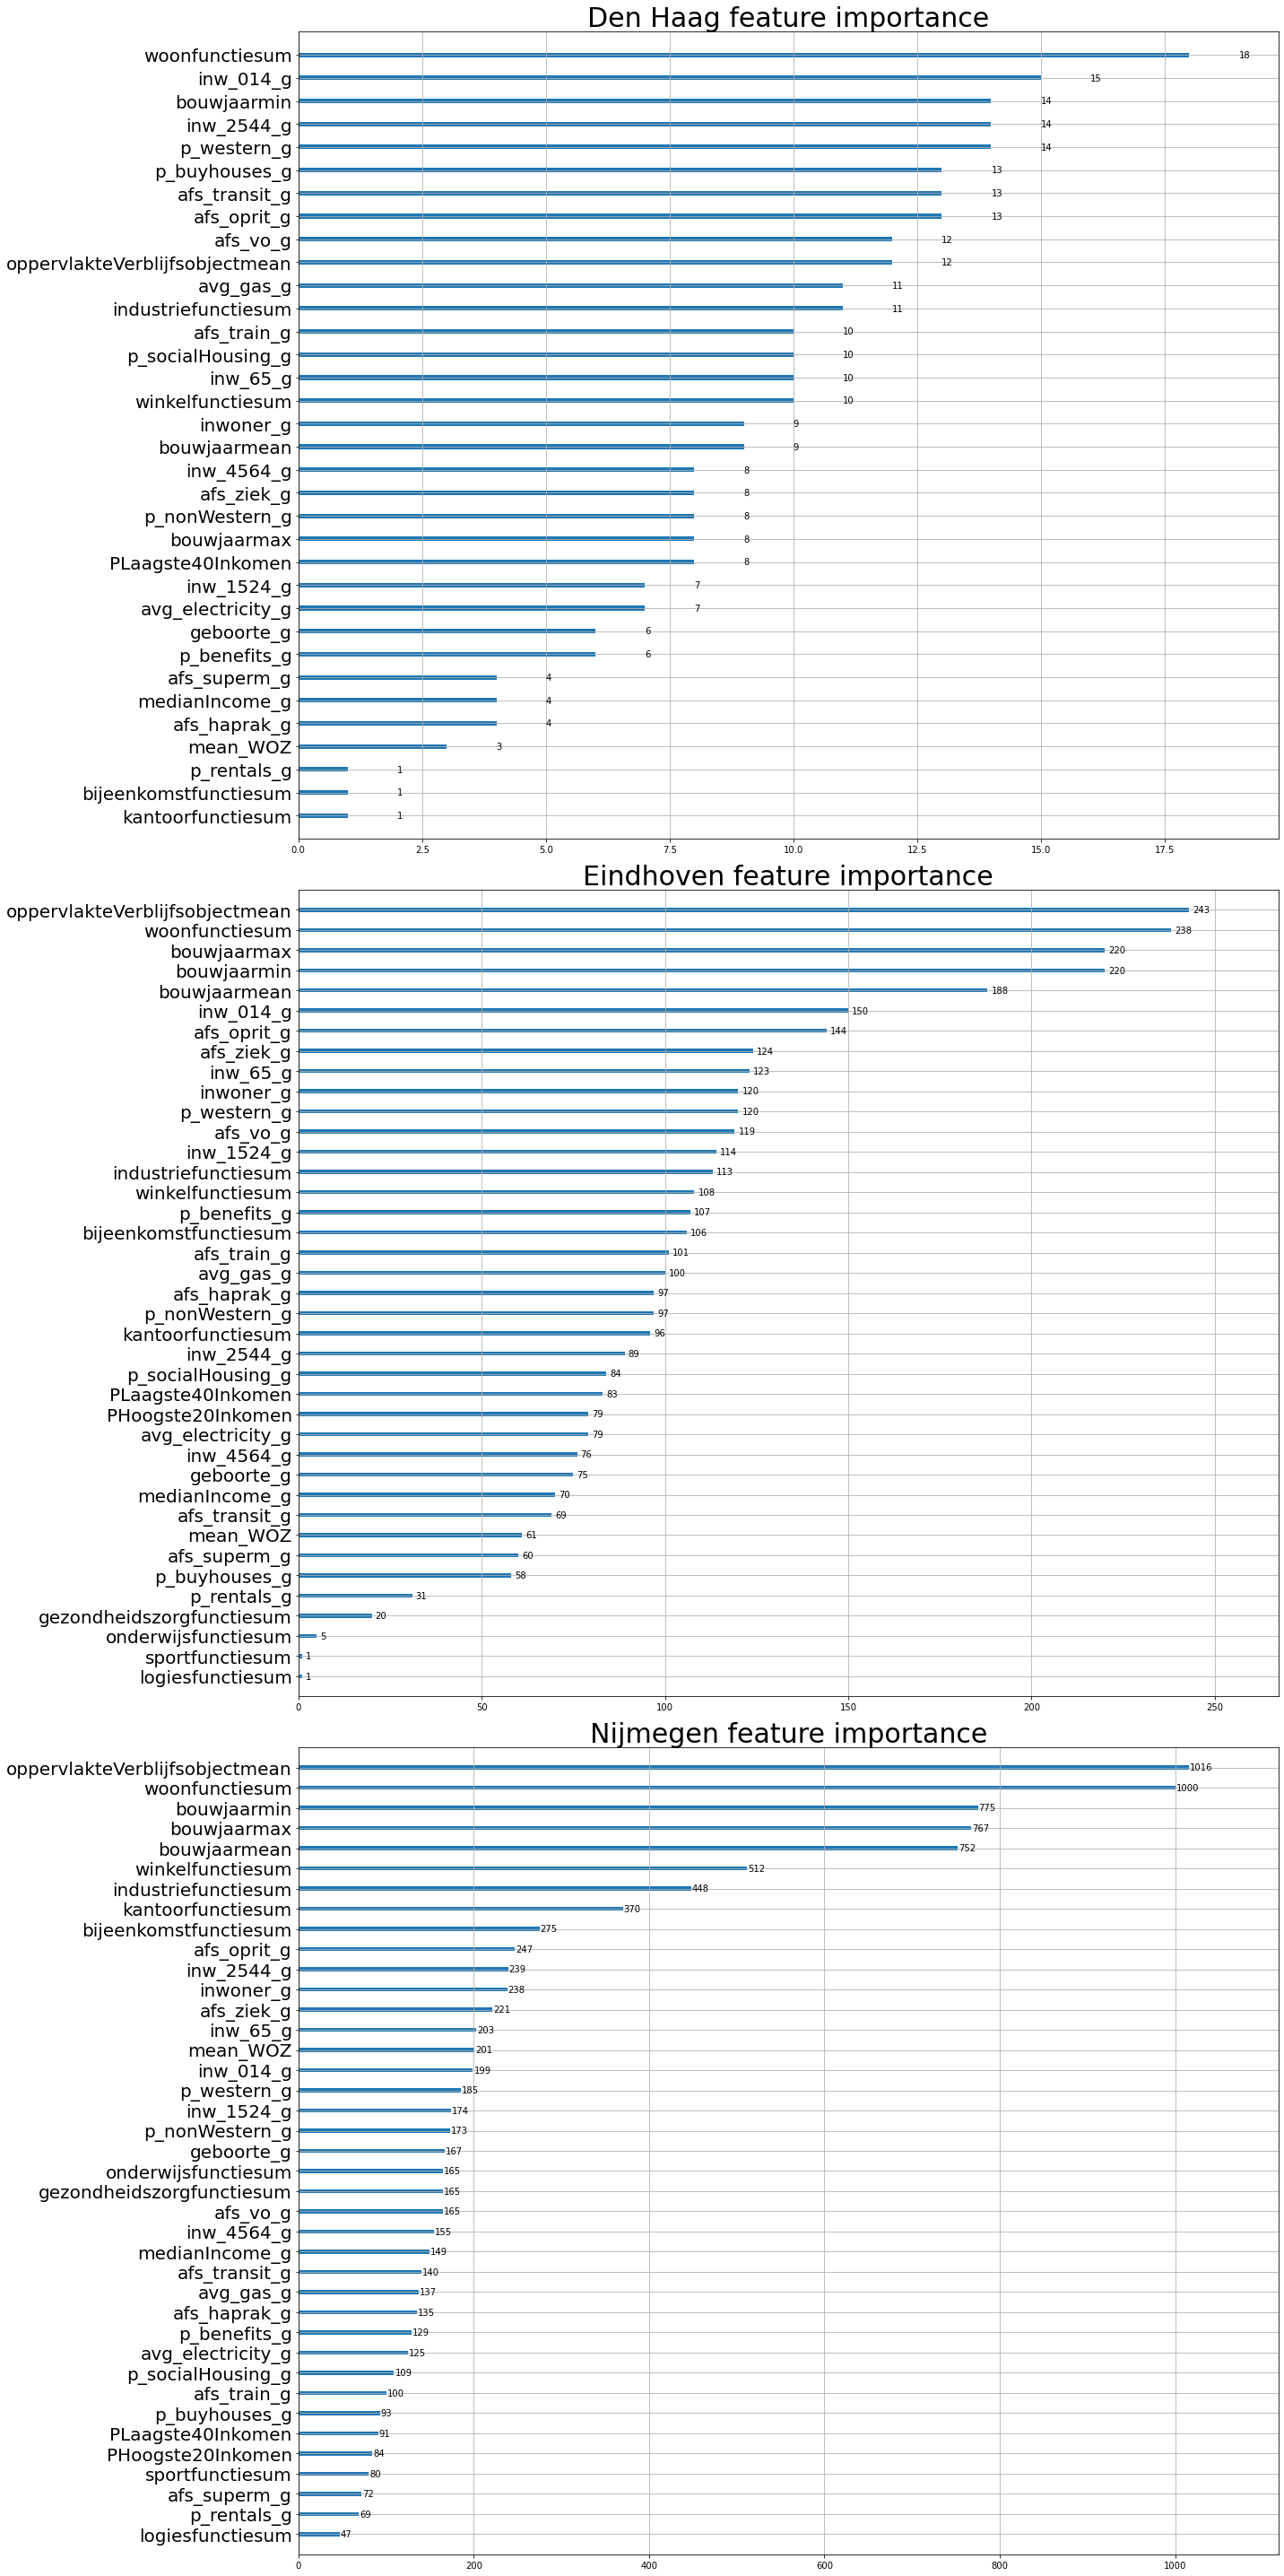

In [220]:
def change_them_ticks(ax):
    Text_yticklabels = list(ax.get_yticklabels())
    dict_features = dict(enumerate(DH.columns))
    lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
    lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]
    return lst_yticklabels

fig, ax = plt.subplots(3, figsize = (20,40))
xgboost.plot_importance(DHx, ax = ax[0])
xgboost.plot_importance(EHx, ax = ax[1])
xgboost.plot_importance(NMx, ax = ax[2])

ax[0].set_title("Den Haag feature importance", size = 30)
ax[0].set_yticklabels(change_them_ticks(ax[0]), size = 20)
ax[1].set_title("Eindhoven feature importance", size = 30)
ax[1].set_yticklabels(change_them_ticks(ax[1]), size = 20)
ax[2].set_title("Nijmegen feature importance", size = 30)
ax[2].set_yticklabels(change_them_ticks(ax[2]), size = 20)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
plt.tight_layout()

plt.savefig("../figures/featureimportance.png")

In [203]:
Text_yticklabels = list(ax[1].get_yticklabels())
dict_features = dict(enumerate(DH.columns))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

ax[1].set_yticklabels(lst_yticklabels)

TypeError: argument of type 'Text' is not iterable

In [182]:
DH.columns[:-6]

Index(['bijeenkomstfunctiesum', 'gezondheidszorgfunctiesum',
       'industriefunctiesum', 'kantoorfunctiesum', 'logiesfunctiesum',
       'onderwijsfunctiesum', 'sportfunctiesum', 'winkelfunctiesum',
       'woonfunctiesum', 'oppervlakteVerblijfsobjectmean', 'inwoner_g',
       'geboorte_g', 'inw_014_g', 'inw_1524_g', 'inw_2544_g', 'inw_4564_g',
       'inw_65_g', 'p_western_g', 'p_nonWestern_g', 'p_buyhouses_g',
       'p_rentals_g', 'p_socialHousing_g', 'medianIncome_g',
       'avg_electricity_g', 'avg_gas_g', 'p_benefits_g', 'afs_haprak_g',
       'afs_ziek_g', 'afs_superm_g', 'afs_vo_g', 'afs_oprit_g', 'afs_train_g',
       'afs_transit_g', 'mean_WOZ', 'PLaagste40Inkomen', 'PHoogste20Inkomen',
       'bouwjaarmean', 'bouwjaarmin', 'bouwjaarmax', 'y-1'],
      dtype='object')

In [142]:
EHx.get_booster().feature_names

In [145]:
DHx.get_booster().feature_names = DH.columns

In [156]:
import xgboost as xgb

In [165]:
xgb.plot_importance(DHx)

NotImplementedError: 

In [164]:
DHx.get_booster().feature_names = DH.columns